In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
tree_census = pd.read_csv(r'C:\Users\RM\Downloads\2015-street-tree-census-tree-data.csv')
tree_census  # to avoid any unicode errors we use r.

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,2015-08-18T00:00:00.000,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,2015-08-29T00:00:00.000,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,2015-08-22T00:00:00.000,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,2015-08-29T00:00:00.000,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [3]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [4]:
tree_census_subset =tree_census[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'] ]
tree_census_subset


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No


In [5]:
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
guards        31616
sidewalk      31616
user_type         0
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [6]:
#show health column where values are null

tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No


In [7]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [8]:
tree_census_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
steward       object
guards        object
sidewalk      object
user_type     object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

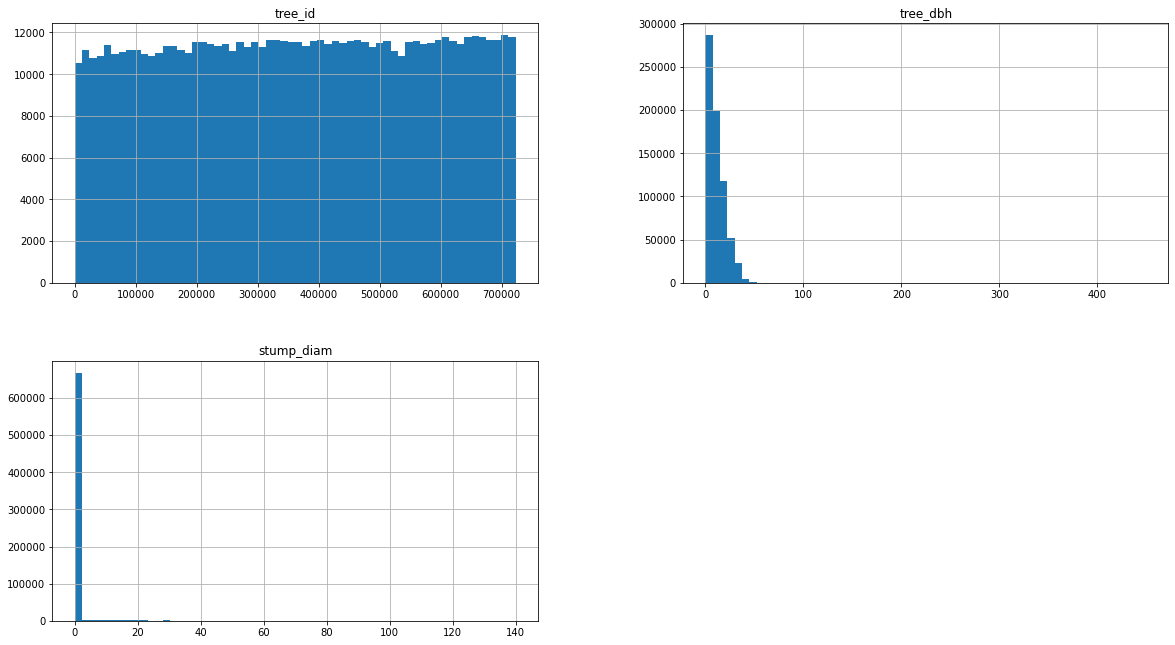

In [9]:
tree_census_subset.hist(bins=60, figsize=(20,11))

In [10]:
big_trees = tree_census_subset[tree_census_subset['tree_dbh']>50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,None,NoDamage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,None,NoDamage,Volunteer,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='tree_dbh'>

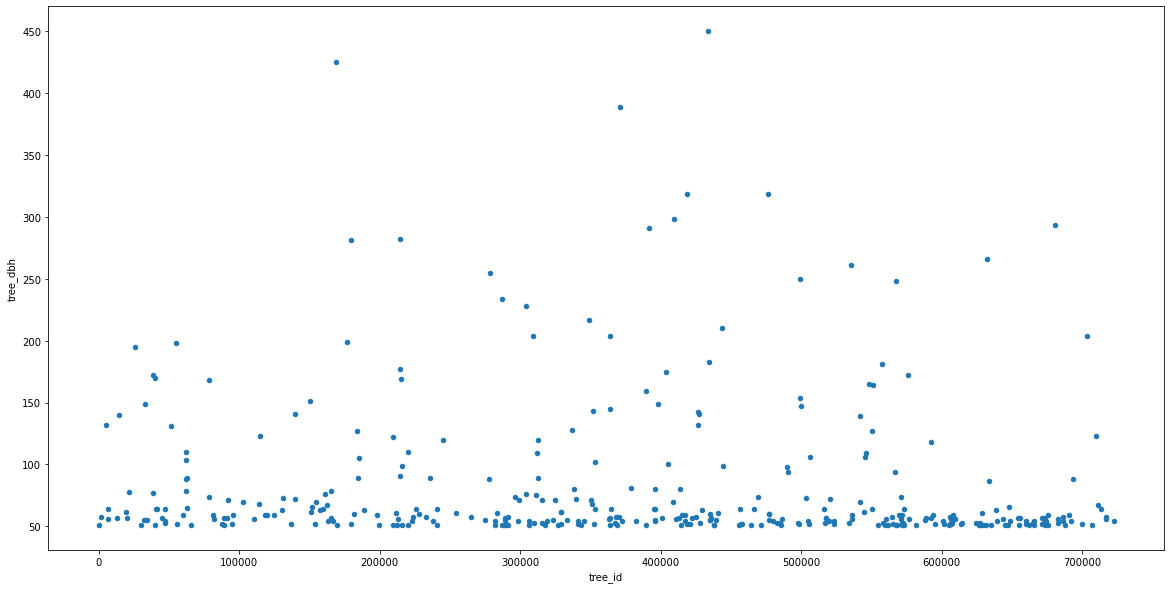

In [11]:
big_trees[['tree_dbh','tree_id']].plot(kind='scatter', x='tree_id',y='tree_dbh',figsize=(20,10))

<AxesSubplot:>

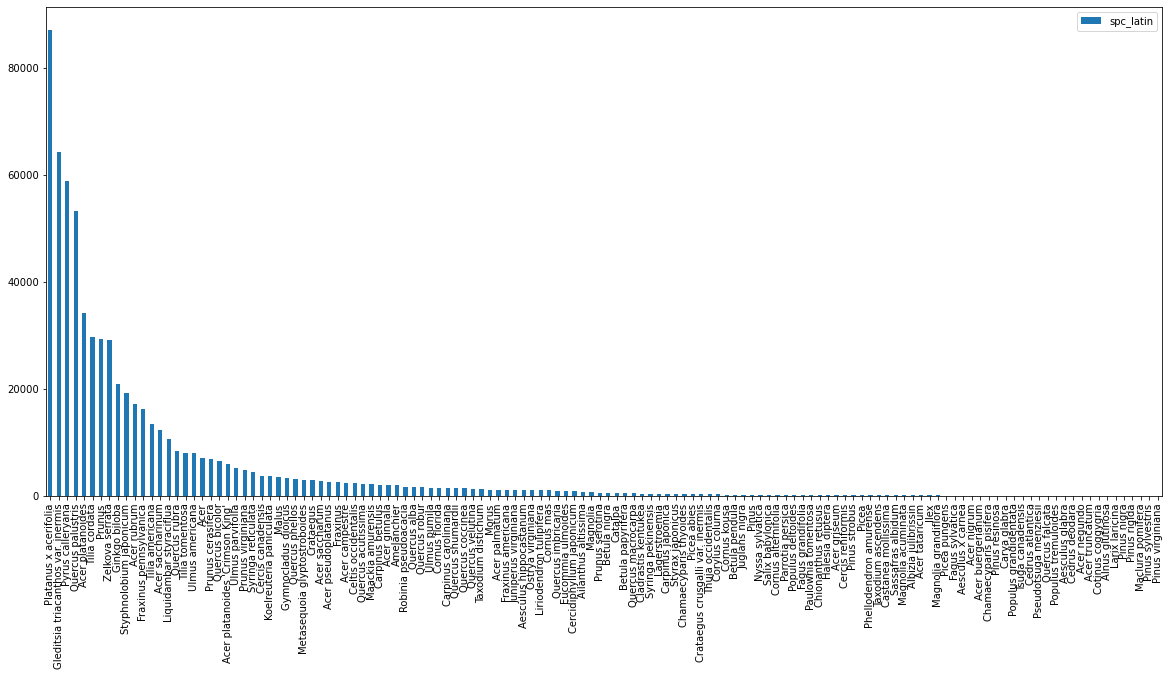

In [12]:
pd.DataFrame(tree_census_subset['spc_latin'].value_counts()).plot(kind='bar',figsize=(20,9))

In [13]:
tree_census_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [14]:
tree_census_subset['guards'].value_counts()

None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: guards, dtype: int64

In [15]:
tree_census_subset['sidewalk'].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [16]:
tree_census_subset['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [17]:
tree_census_subset['problems'].value_counts()

None                                                              426280
Stones                                                             95673
BranchLights                                                       29452
Stones,BranchLights                                                17808
RootOther                                                          11418
                                                                   ...  
MetalGrates,RootOther,TrunkLights,BranchLights                         1
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchOther          1
Stones,TrunkOther,BranchLights,Sneakers,BranchOther                    1
WiresRope,TrunkOther,BranchLights,Sneakers                             1
Stones,MetalGrates,RootOther,WiresRope,TrunkOther,BranchLights         1
Name: problems, Length: 232, dtype: int64

In [18]:
tree_census_subset[tree_census_subset['status']=='Dead']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No


In [19]:
tree_census_subset[tree_census_subset['status']=='Stump']  

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No


In [20]:
tree_prb = tree_census_subset[['problems', 'root_stone',
       'root_grate', 'root_other']]
tree_prb

,problems,root_stone,root_grate,root_other
0,None,No,No,No
1,Stones,Yes,No,No
2,None,No,No,No
3,Stones,Yes,No,No
4,Stones,Yes,No,No
...,...,...,...,...
683783,None,No,No,No
683784,None,No,No,No
683785,None,No,No,No
683786,None,No,No,No


In [21]:
tree_prb.apply(pd.Series.value_counts)

,problems,root_stone,root_grate,root_other
BranchLights,29452.0,NaN,NaN,NaN
"BranchLights,BranchOther",756.0,NaN,NaN,NaN
"BranchLights,Sneakers",33.0,NaN,NaN,NaN
"BranchLights,Sneakers,BranchOther",2.0,NaN,NaN,NaN
BranchOther,8352.0,NaN,NaN,NaN
...,...,...,...,...
"WiresRope,TrunkOther,BranchLights,BranchOther",56.0,NaN,NaN,NaN
"WiresRope,TrunkOther,BranchLights,Sneakers",1.0,NaN,NaN,NaN
"WiresRope,TrunkOther,BranchOther",68.0,NaN,NaN,NaN
"WiresRope,TrunkOther,Sneakers",1.0,NaN,NaN,NaN


In [22]:
mask = ((tree_census_subset['status']=='Stump') | (tree_census_subset['status']=='Dead'))


In [23]:
tree_census_subset.loc[mask]= tree_census_subset.loc[mask].fillna('not applicable')

C:\Users\RM\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [26]:
tree_census_subset[tree_census_subset["status"]=='Stump']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,TreesCount Staff,not applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,TreesCount Staff,not applicable,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,TreesCount Staff,not applicable,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,NYC Parks Staff,not applicable,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,TreesCount Staff,not applicable,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No


In [28]:
tree_census_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
guards         1
sidewalk       1
user_type      0
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [30]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No


In [31]:
tree_census_subset['steward'].value_counts()

None              487823
1or2              143557
not applicable     31615
3or4               19183
4orMore             1610
Name: steward, dtype: int64

In [33]:
tree_census_subset[tree_census_subset['sidewalk'].isna()]
tree_census_subset['sidewalk'].value_counts()

NoDamage          464978
Damage            187194
not applicable     31615
Name: sidewalk, dtype: int64

In [44]:
tree_census_subset[tree_census_subset['guards'].isna()]
tree_census_subset['guards'].value_counts()

None              572306
Helpful            51866
not applicable     31615
Harmful            20252
Unsure              7748
Name: guards, dtype: int64

In [45]:
tree_census_subset['health'].fillna('Good', inplace= True)
tree_census_subset['problems'].fillna('None', inplace=True)
tree_census_subset['spc_latin'].fillna('No observation', inplace=True)
tree_census_subset['sidewalk'].fillna('NoDamage', inplace=True)
tree_census_subset['guards'].fillna('None', inplace=True)

C:\Users\RM\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [47]:
tree_census_subset.isna().sum()  #we have eliminated all the null values

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [51]:
big_trees = tree_census_subset[(tree_census_subset['tree_dbh']>60) | (tree_census_subset['stump_diam']>50)]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
6122,200925,0,52,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No
6177,200924,0,55,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,Volunteer,not applicable,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,not applicable,not applicable,not applicable,not applicable,not applicable,NYC Parks Staff,not applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No


In [53]:
tree_census_subset=tree_census_subset[(tree_census_subset['tree_dbh']<=60) & (tree_census_subset['stump_diam']<=60)]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No


In [54]:
tree_census_subset_alive=tree_census_subset[tree_census_subset['status']=='Alive']
tree_census_subset_Dead_or_Stump = tree_census_subset[(tree_census_subset['status']=='Dead') | (tree_census_subset['status']=='Stump')]

In [59]:
sta_alive = tree_census_subset_alive.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin','25%','75%']]
sta_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [72]:
tree_census_subset_alive.merge(sta_alive, on='spc_latin',how='left',copy=True, indicator=False, validate=None)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,5.0,14.0


In [76]:
mask =tree_census_subset_alive['tree_dbh']<tree_census_subset_alive['25%']
tree_census_subset_alive.loc[mask,'tree_dbh']= tree_census_subset_alive['25%']

mask =tree_census_subset_alive['tree_dbh']>tree_census_subset_alive['75%']
tree_census_subset_alive.loc[mask, 'tree_dbh']=tree_census_subset_alive['75%']

tree_census_subset_alive

KeyError: '25%'